# Instructions 

- Make sure you’re logged into Kaggle.
- Load the **Video Game Sales dataset** (CSV file is provided in the Kaggle input section).  
- Carefully read through each step and run the cells in order.  
- Do **not** skip steps — each builds on the previous one.  
- Add your own observations wherever possible, especially when exploring graphs.  
- Remember: This is practice for real-world data preprocessing + EDA, so try to think *why* each step is done, not just *how*.  
- At the end, feel free to explore further — add more plots, groupbys, or questions you want to answer!  



Welcome to your next checkpoint on the Synapse road!
Today we’re diving into the Video Game Sales dataset to practice real-world data preprocessing + EDA. Think of this like prepping ingredients before cooking — we’ll clean, slice, and plate the data so insights pop 🍽️

We’ll be using pandas, numpy, matplotlib, and seaborn for this task.
Run the following cell to import them

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Alright, now that we’ve got our tools ready, let’s bring in the star of the show — the **Video Game Sales dataset** 🎮  

Your task:  
- Load the dataset into a pandas DataFrame.  
- Take a quick peek at the first few rows using.  
- Check the shape of the dataset to see how big this universe is.  

Think of this step as unboxing a new console — gotta see what’s inside first!  


In [2]:
df = pd.read_csv('../input/videogamesales/vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.shape

(16598, 11)

### 🕹️ Level 1: Meet the Characters  

Now that we’ve unboxed our dataset, let’s get to know the **cast of characters**:  
- What kinds of columns do we have? (numeric, object, etc.)  
- How many missing values are there?  

Your task:  
- To get a quick overview of column types + null values.  
- To double-check the data types.  

This step is like reading the **character bios** before starting a game   


In [5]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [6]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

### 🎯 Level 2: Quick Stats Check (Describe the Data)  

Every good gamer checks the **stats screen** before playing  
Now, let’s do the same for our dataset:  

Your task:  
- To get summary statistics for numerical columns.  
- Notice things like average sales, max values, and distribution hints.  

This is like peeking at the **scoreboard** — who’s leading, what’s the high score?   


In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## 🧹 Level 3: Clean the Map (Missing Values)

Time to sweep the floor before we play.

**Your tasks:**
- Check how many missing values are in each column.
- For this dataset, handle missing values in **`Year`** and **`Publisher`** by removing those rows.
- Re-check to confirm there are **no missing values left**.

> Tip: Do a quick sanity check after cleaning (row count should drop a bit).


In [8]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
df.drop(['Year','Publisher'], axis=1).copy()

,Rank,Name,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,Sports,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,Racing,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,Sports,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,Platform,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,Shooter,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,Racing,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,Puzzle,0.00,0.01,0.00,0.00,0.01


## 🔢 Level 4: Patch the `Year` Column (Data Types)

`Year` often shows up as a float (e.g., `2008.0`) because of missing values earlier.

**Your tasks:**
- Convert **`Year`** to **integer**.
- Re-run a quick `info` to confirm the dtype change.

> If conversion fails, revisit Level 3 — some NaNs may still be lurking.


In [10]:
df['Year'] = df['Year'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  Int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB



## 🎮 Level 5: Spotting the Legends  
Now that we’ve explored platforms and genres, let’s look at the **all-time best sellers**.  
Your task:  

List the **Top 5 best-selling video games**.  
We’ll display their **Name, Platform, Genre, and Global Sales**.  

Think of this as the **Hall of Fame of Video Games** 




In [11]:
ax = df[['Name','Platform','Genre','Global_Sales']] \
    .sort_values('Global_Sales', ascending = False) \
    .head()
ax

,Name,Platform,Genre,Global_Sales
0,Wii Sports,Wii,Sports,82.74
1,Super Mario Bros.,NES,Platform,40.24
2,Mario Kart Wii,Wii,Racing,35.82
3,Wii Sports Resort,Wii,Sports,33.00
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,31.37



## 🎮 Level 6: Which Console Ruled the Game?  
Every console/platform has a legacy — but which one released the **most number of games**?  

Count the number of games released on each platform.  
Create a **bar chart** to visualize it.  
Finally, answer: **Which platform has the highest number of releases?** 

  


In [12]:
df['Platform'].value_counts().head(10)

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
Name: count, dtype: int64

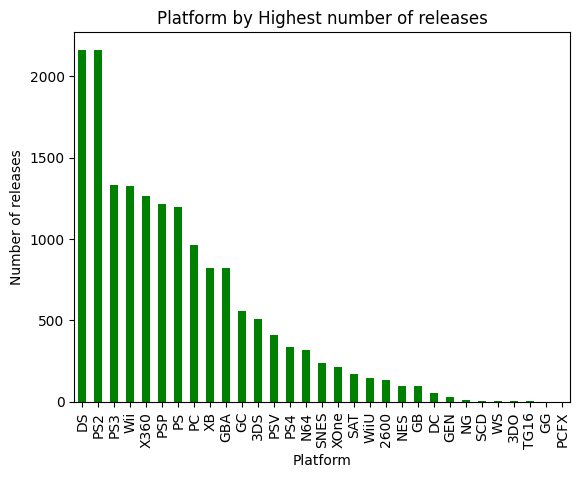

In [13]:
ax = df['Platform'].value_counts() \
    .plot(kind='bar', title='Platform by Highest number of releases', color='green')
ax.set_xlabel('Platform')
ax.set_ylabel('Number of releases')
plt.show()

Hence from the above chart we can deduce that DS has the highest number of games released (2163)


## 🏢 Level 7: The Big Bosses (Top Publishers)  
Some publishers dominate the industry like final bosses 

Your task:  
- Find the **Top 5 publishers** with the highest **total Global Sales**.  
- Show their contribution using a **pie chart** 

This will help us see who really controlled the gaming world  


In [14]:
ax = df.groupby('Publisher')['Global_Sales'] \
    .sum() \
    .sort_values(ascending = False) \
    .head(5)
ax

Publisher
Nintendo                       1786.56
Electronic Arts                1110.32
Activision                      727.46
Sony Computer Entertainment     607.50
Ubisoft                         474.72
Name: Global_Sales, dtype: float64

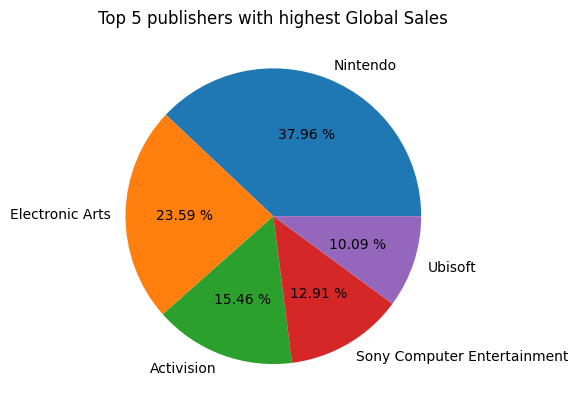

In [15]:
plt.pie(ax, labels=ax.index, autopct='%2.2f %%')
plt.title('Top 5 publishers with highest Global Sales')
plt.show()


## 🌍 Level 8: Genre Champions in Europe  
Different genres have their own kings in different regions.  
Let’s focus on **Europe (EU Sales)** for now.  

Your task:  
- For **each Genre**, find the **Publisher** that has the highest **total EU Sales**.  
- Print the results as a list (Genre → Top Publisher).  

Think of this as awarding the **regional championship belts**  



In [16]:
eu = df[['EU_Sales', 'Genre', 'Publisher']]
eu = eu.rename(columns={'Publisher':'Top_Publisher'})
ax1 = eu.groupby(['Genre','Top_Publisher'])['EU_Sales'].sum().reset_index()
idx = ax1.groupby('Genre')['EU_Sales'].idxmax()
ax2 = ax1.loc[idx]
top = ax2[['Genre', 'Top_Publisher']].reset_index(drop = True)
print("Genre and their top publishers\n")
for index, row in top.iterrows():
    print(f"{row['Genre']} → {row['Top_Publisher']}")

Genre and their top publishers

Action → Take-Two Interactive
Adventure → Ubisoft
Fighting → THQ
Misc → Nintendo
Platform → Nintendo
Puzzle → Nintendo
Racing → Electronic Arts
Role-Playing → Nintendo
Shooter → Activision
Simulation → Electronic Arts
Sports → Electronic Arts
Strategy → Activision



## 🎯 Level 9: Nintendo’s Golden Year  
Nintendo is one of the biggest names in gaming 🎮  
But… which year did Nintendo achieve its **highest total Global Sales**?  

Your task:  
- Filter the dataset for **Publisher = Nintendo**.  
- Group sales by year.  
- Find the year with the **highest global sales**.  

This is like uncovering the **peak of Nintendo’s power**   



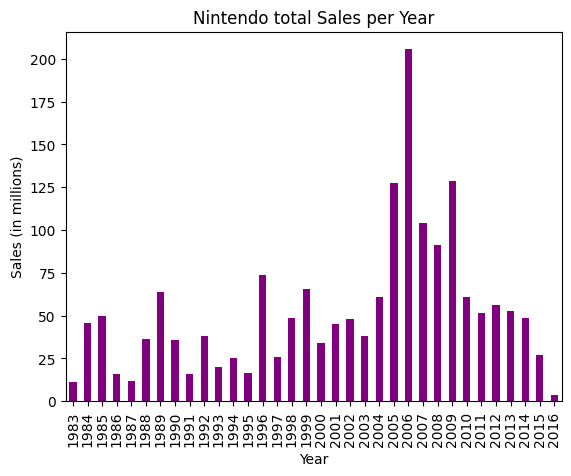

In [17]:
s = df.query('Publisher == "Nintendo"') \
    .groupby('Year')['Global_Sales'] \
    .sum() \
    .plot(kind='bar', color='purple') 
s.set_xlabel('Year') 
s.set_ylabel('Sales (in millions)') 
s.set_title('Nintendo total Sales per Year')
plt.show()

In the year 2006, Nintendo had the highest global sales.


## 🏟️ Final Boss Arena: The Data Playground  

You’ve fought through all the levels ⚔️, now it’s time to explore on your own 🎉  

Your final mission:  
- Choose **any 2–3 plots** (your choice!) that show **interesting patterns** in the data.   

💡 This is your **creative zone** → Think of it as building your own “story” from the dataset.  

When you’re done, share your best plot with the team — let’s see who finds the coolest insight!  



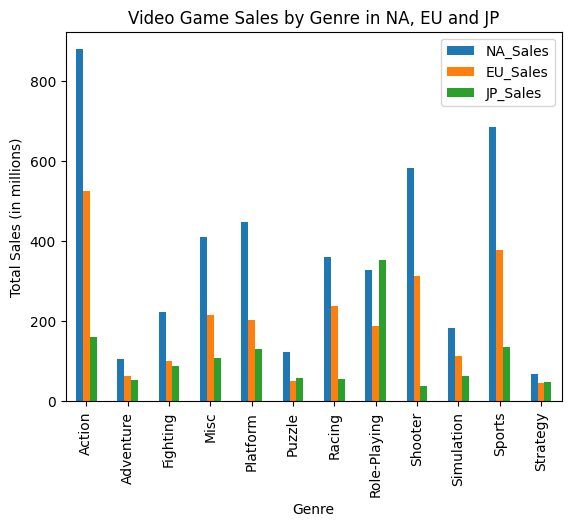

In [18]:
sales = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales']]
gs = sales.groupby('Genre').sum()
gs[['NA_Sales', 'EU_Sales', 'JP_Sales']].plot(kind='bar')
plt.title("Video Game Sales by Genre in NA, EU and JP")
plt.xlabel("Genre")
plt.ylabel("Total Sales (in millions)")
plt.show()


From the above graph we can understand the following points
1. The most popular genre in NA and EU is action while that in JP is role playing
2. For most genres NA leads in sales except one that is role playing where JP leads maybe due to manga/anime culture
3. Strategy games are the least popular 

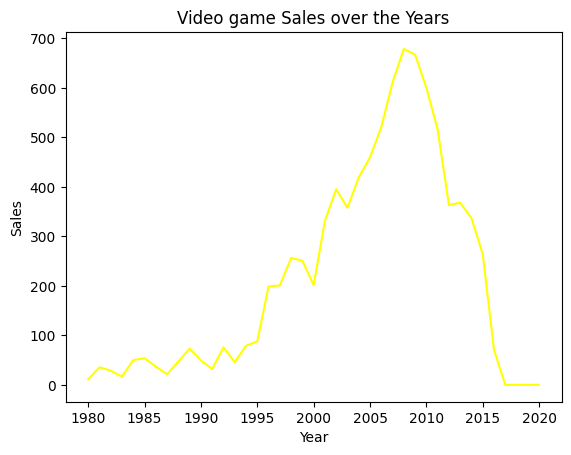

In [19]:
ys = df.groupby('Year')['Global_Sales'] \
    .sum() \
    .plot(kind='line', color='yellow') 
plt.title('Video game Sales over the Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

Video games really became popular during the mid 2005's to 2015 and on researching online I found out that it was due to introduction of 3D - graphics into games making it more appealing and immersive. Post that they have been on a decline which may be due to large collection of free mobile and PC games